In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Consumer_Complaints.csv')

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [5]:
df.shape

(1078111, 18)

In [6]:
df.isna().sum()

Date received                        0
Product                              0
Sub-product                     235170
Issue                                0
Sub-issue                       503949
Consumer complaint narrative    776022
Company public response         733263
Company                              0
State                            13643
ZIP code                         18251
Tags                            929867
Consumer consent provided?      543355
Submitted via                        0
Date sent to company                 0
Company response to consumer         5
Timely response?                     0
Consumer disputed?              309562
Complaint ID                         0
dtype: int64

In [7]:
df.dropna(subset=['Consumer disputed?'], inplace=True)

In [8]:
df.shape

(768549, 18)

In [9]:
disputed = df[df['Consumer disputed?']=='Yes']
disputed.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760
8,11/13/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Aldridge Pite, LLP",CA,93101,NaN,NaN,Referral,12/10/2015,Closed with explanation,Yes,Yes,1654890
12,02/03/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,NaN,"The CBE Group, Inc.",TX,752XX,NaN,Consent provided,Web,02/03/2016,Closed with explanation,Yes,Yes,1772196
13,01/07/2015,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Experian Information Solutions Inc.,NV,89169,NaN,NaN,Referral,01/23/2015,Closed with explanation,Yes,Yes,1184859


In [10]:
undisputed = df[df['Consumer disputed?']=='No']
undisputed.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
5,11/13/2013,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,U.S. BANCORP,MN,48322,NaN,NaN,Phone,11/20/2013,Closed with monetary relief,Yes,No,596562
6,06/16/2015,Debt collection,Medical,Improper contact or sharing of info,Contacted employer after asked not to,NaN,Company believes it acted appropriately as aut...,California Accounts Service,CA,92111,NaN,Consent not provided,Web,06/19/2015,Closed with explanation,Yes,No,1422680


In [11]:
disputed.shape[0]

148378

In [12]:
undisputed.shape[0]

620171

In [13]:
disputed_product_counts = disputed['Product'].value_counts()
disputed_product_counts

Mortgage                   51369
Debt collection            25634
Credit reporting           22113
Credit card                18204
Bank account or service    16028
Consumer Loan               6771
Student loan                5936
Payday loan                  797
Money transfers              782
Prepaid card                 536
Other financial service      199
Virtual currency               9
Name: Product, dtype: int64

### Question: Which Products have the highest number of disputes?

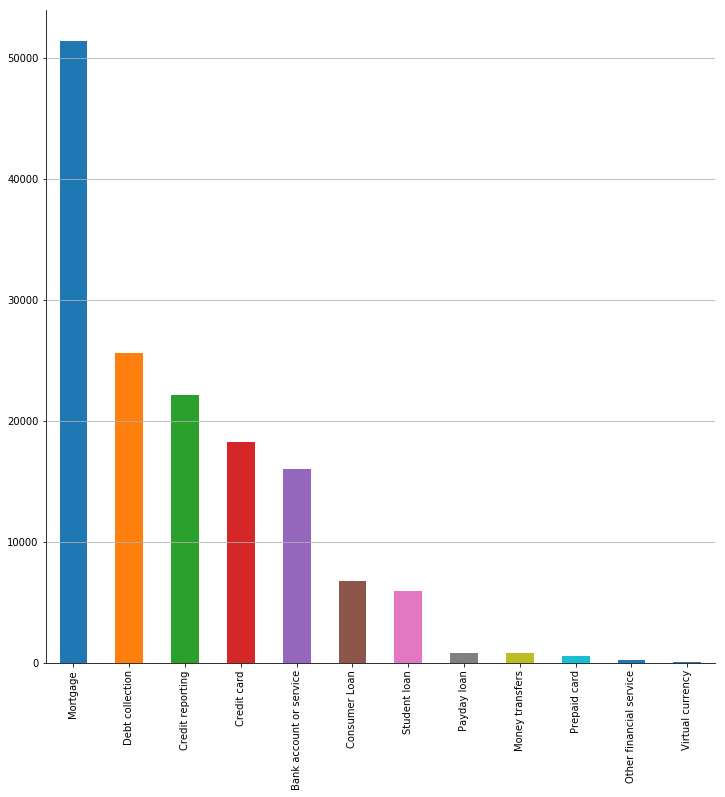

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
ax = disputed_product_counts.plot(kind='bar', xticks=[10000,20000,30000,40000,50000])
plt.grid(axis='y')
sns.despine(right=True, bottom=False)